In [10]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
def clean_df(df):
    df = df.fillna(-1)
    df = df.replace(r'[^0-9]+',-1)
    df = df.replace('',-1)
    df = df.replace(' ',-1)
    df = df.replace('\n',-1)
    return df

In [12]:
data = pd.read_csv("results.csv", delim_whitespace=True) 
data = clean_df(data)

# data = data.drop([0])

data["Clock"] = pd.to_numeric(data["Clock"],errors='coerce')
data["BrMisAll"] = pd.to_numeric(data["BrMisAll"],errors='coerce')
data["BrIndir"] = pd.to_numeric(data["BrIndir"],errors='coerce')
data["BrMispInd"] = pd.to_numeric(data["BrMispInd"],errors='coerce')
data["BrClear"] = pd.to_numeric(data["BrClear"],errors='coerce')


num_rows = len(data)
same_pc_bits = pd.Series([(i // 40) for i in range(num_rows)])
data["SamePCLowerBits"] = same_pc_bits

drop_indices = [i for j in range(num_rows // 40) for i in range(40*j, 40*j + 20)]
data = data.drop(drop_indices)


# for i in range(num_rows // 40):
#     data = data.drop(40*i)
# data["Dec-uops"] = pd.to_numeric(data["Dec-uops"],errors='coerce')
# data["DSB-uops"] = pd.to_numeric(data["DSB-uops"],errors='coerce')
# data["LSD-uops"] = pd.to_numeric(data["LSD-uops"],errors='coerce')
# data["Dec-uops"] = (data["Dec-uops"]) / (data["DSB-uops"])
# data["LSD-uops"] = (data["LSD-uops"]) / (data["DSB-uops"])
# data["DSB-uops"] = (data["DSB-uops"]) / (data["BrRetired"])


#data["BrRetired"] = (data["BrRetired"]) // 1000
#data["ICacheMiss"] = (data["ICacheMiss"]) / (data["BrRetired"]*1000)
#data["Clock"] = (data["Clock"]) / (data["BrRetired"]*1000)
data["BrMispInd_Rate"] = data["BrMispInd"] / data["BrIndir"]

# mode_value = data['BrRetired'].mode()[0]
# data['BrRetired'] = data['BrRetired'].apply(lambda x: mode_value if x != mode_value else x)

In [13]:
data

,Clock,BrMisAll,BrIndir,BrMispInd,BrClear,SamePCLowerBits,BrMispInd_Rate
20,6742159,8001,4000,2000,0,0,0.50000
21,6751321,7999,4000,1999,0,0,0.49975
22,6739412,8001,4000,2000,0,0,0.50000
23,6744594,8006,4000,1998,0,0,0.49950
24,6738347,8001,4000,2000,0,0,0.50000
...,...,...,...,...,...,...,...
795,126037534,14031,4000,1998,8004,19,0.49950
796,126308417,14024,4000,2000,8001,19,0.50000
797,126199393,14018,4000,2000,8001,19,0.50000
798,126032224,14882,4000,2000,9068,19,0.50000


[(-0.1, 1.1)]

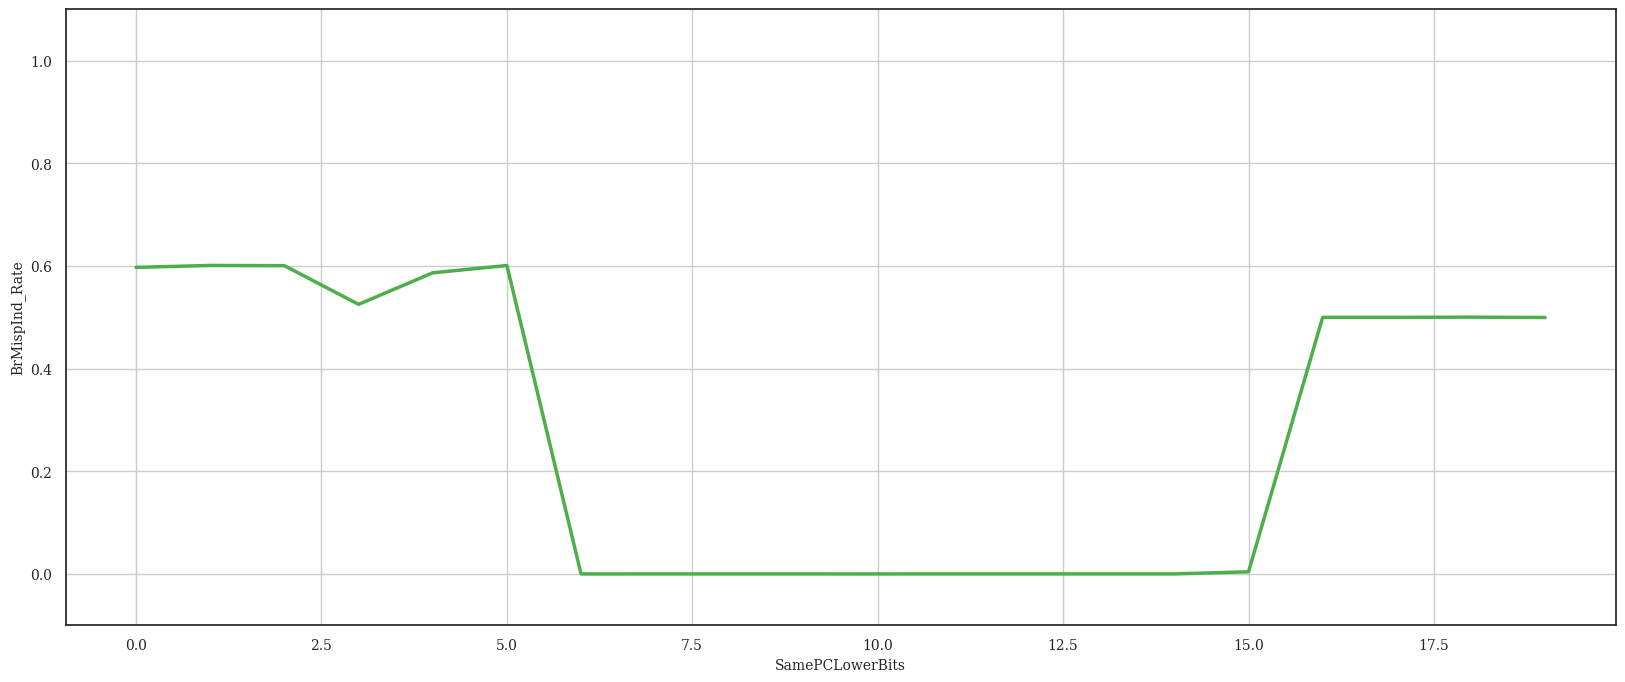

In [14]:

def set_style():
    plt.rcParams["font.family"] = "serif"
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['ps.fonttype'] = 42
    sns.set(rc={'figure.figsize':(20,8),"font.size":10, "font.family": "serif", 
                "axes.titlesize":10,"axes.labelsize": 10, "ytick.labelsize":10, 
                 "xtick.labelsize":10 , 'legend.fontsize':10, 'legend.title_fontsize': 10}, style="white")

set_style()

p = sns.lineplot(data=data, x="SamePCLowerBits", y="BrMispInd_Rate", marker="o", color=sns.color_palette("Set1")[2], linewidth=2.5, markersize = 0, errorbar=None)
p.grid()
# p.set_xscale('log', base=2)
# p.set(xlim=(0,9))
p.set(ylim=(-0.1,1.1))

# Saving the Seaborn Figure:
# plt.savefig('res.pdf', bbox_inches='tight')